# Partial Derivative

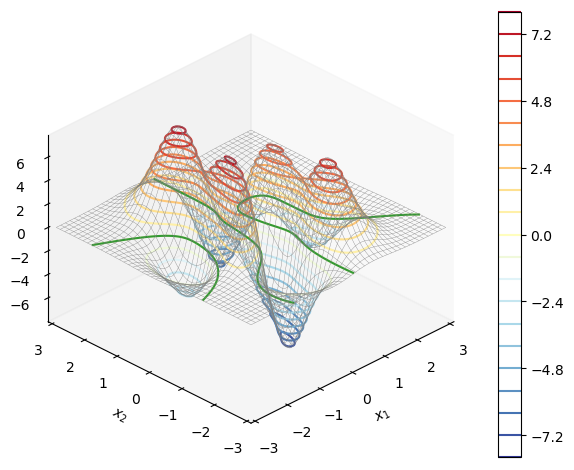

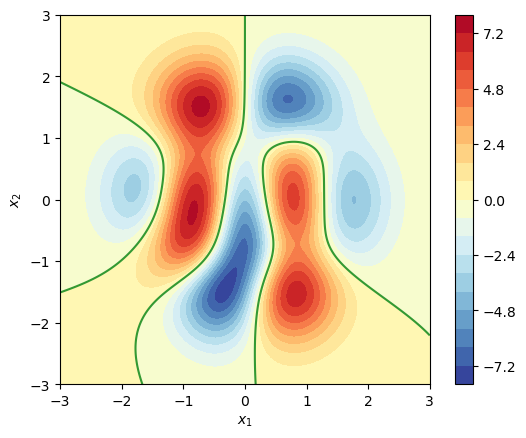

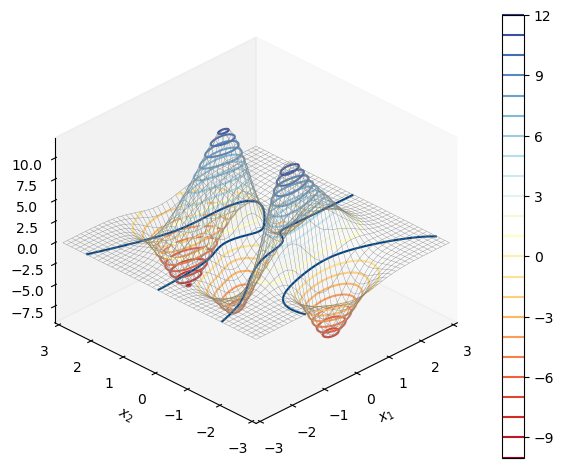

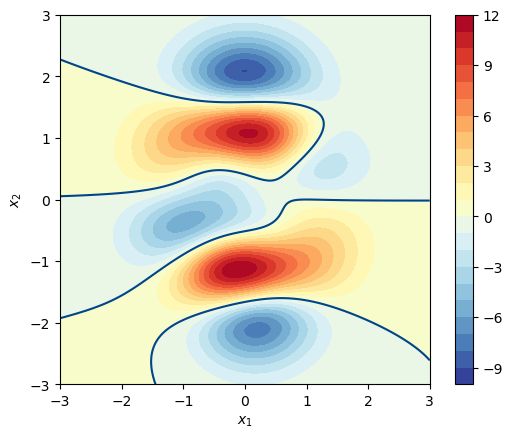

In [31]:
import numpy as np
from sympy import lambdify, diff, exp, latex
from sympy.abc import x, y
import numpy as np
from matplotlib import pyplot as plt 

num = 301; # number of mesh grids
x_array = np.linspace(-3,3,num)
y_array = np.linspace(-3,3,num)
xx,yy = np.meshgrid(x_array,y_array)

plt.close('all')

#f_xy = x*exp(- x**2 - y**2);
f_xy =  3*(1-x)**2*exp(-(x**2) - (y+1)**2)\
    - 10*(x/5 - x**3 - y**5)*exp(-x**2-y**2)\
    - 1/3*exp(-(x+1)**2 - y**2) 

f_xy_fcn = lambdify([x,y],f_xy)
f_xy_zz = f_xy_fcn(xx,yy)

#    partial derivative with respect to x1

df_dx = f_xy.diff(x)

df_dx_fcn = lambdify([x,y],df_dx)
df_dx_zz = df_dx_fcn(xx,yy)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(xx,yy, df_dx_zz,
                  color = [0.5,0.5,0.5],
                  linewidth = 0.25)

colorbar = ax.contour(xx,yy, df_dx_zz,20,
             cmap = 'RdYlBu_r')

ax.contour(xx,yy, df_dx_zz, levels = [0],
           colors = '#339933',
           linestyles = '-')

fig.colorbar(colorbar, ax=ax)
ax.set_proj_type('ortho')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f_{x1}(x_1,x_2)$')
plt.tight_layout()
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.view_init(azim=-135, elev=30)
ax.grid(False)
plt.show()

# plotting contour filling pic 
fig, ax = plt.subplots()

colorbar = ax.contourf(xx,yy, df_dx_zz, 20, cmap='RdYlBu_r')

ax.contour(xx,yy, df_dx_zz, levels = [0],
           colors = '#339933',
           linestyles = '-')

fig.colorbar(colorbar, ax=ax)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Bk3_Ch16_01_B

#%% partial derivative with respect to x2

df_dy = f_xy.diff(y)
df_dy_fcn = lambdify([x,y],df_dy)
df_dy_zz = df_dy_fcn(xx,yy)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(xx,yy, df_dy_zz,
                  color = [0.5,0.5,0.5],
                  linewidth = 0.25)

colorbar = ax.contour(xx,yy, df_dy_zz,20,
             cmap = 'RdYlBu')

ax.contour(xx,yy, df_dy_zz, levels = [0],
           colors = '#00448A')

fig.colorbar(colorbar, ax=ax)

ax.set_proj_type('ortho')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f_{x2}(x_1,x_2)$')
plt.tight_layout()
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.view_init(azim=-135, elev=30)
ax.grid(False)
plt.show()

fig, ax = plt.subplots()

colorbar = ax.contourf(xx,yy, df_dy_zz, 20, cmap='RdYlBu_r')

ax.contour(xx,yy, df_dy_zz, levels = [0],
           colors = '#00448A')

fig.colorbar(colorbar, ax=ax)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

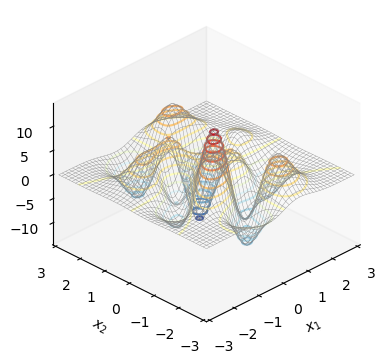

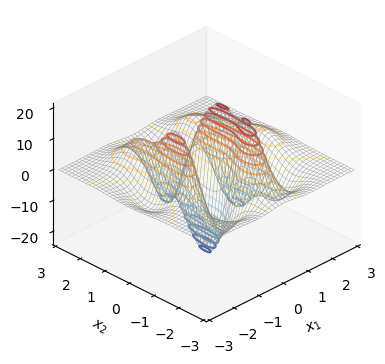

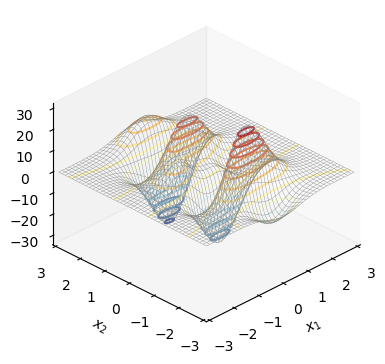

In [32]:
#%% second order partial derivatives

def plot_surface(xx, yy, surface, title_txt):

    fig = plt.figure(figsize=plt.figaspect(0.5))
    
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    
    ax.plot_wireframe(xx,yy, surface,
                      color = [0.5,0.5,0.5],
                      linewidth = 0.25)
    
    colorbar = ax.contour(xx,yy, surface,20,
                 cmap = 'RdYlBu_r')
    
    # fig.colorbar(colorbar, ax=ax)
    
    ax.set_proj_type('ortho')
    
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel(title_txt)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
    ax.view_init(azim=-135, elev=30)
    
    ax.grid(False)
    plt.show()
    
    ax = fig.add_subplot(1, 2, 2)
    
    colorbar = ax.contourf(xx,yy, surface, 20, cmap='RdYlBu_r')
    
    # fig.colorbar(colorbar, ax=ax)
    
    # ax.set_xlim(xx.min(), xx.max())
    # ax.set_ylim(yy.min(), yy.max())
    
    # ax.set_xlabel('$x_1$')
    # ax.set_ylabel('$x_2$')
    # plt.gca().set_aspect('equal', adjustable='box')
    
    # plt.show()
    


    
d2f_dxdy = f_xy.diff(x,y)
# d2f_dxdy = df_dy.diff(x)
# d2f_dxdy = df_dx.diff(y)
d2f_dxdy_fcn = lambdify([x,y],d2f_dxdy)
d2f_dxdy_zz = d2f_dxdy_fcn(xx,yy)

title_txt = '$f_{x1,x2}(x1,x2)$'
plot_surface(xx, yy, d2f_dxdy_zz, title_txt)

d2f_dxdx = f_xy.diff(x,2)
# d2f_dxdx = df_dx.diff(x)
d2f_dxdx_fcn = lambdify([x,y],d2f_dxdx)
d2f_dxdx_zz = d2f_dxdx_fcn(xx,yy)

title_txt = '$f_{x1,x1}(x1,x2)$'
plot_surface(xx, yy, d2f_dxdx_zz, title_txt)

d2f_dydy = f_xy.diff(y,2)
# d2f_dydy = df_dy.diff(y)
d2f_dydy_fcn = lambdify([x,y],d2f_dydy)
d2f_dydy_zz = d2f_dydy_fcn(xx,yy)

title_txt = '$f_{x2,x2}(x1,x2)$'
plot_surface(xx, yy, d2f_dydy_zz, title_txt)

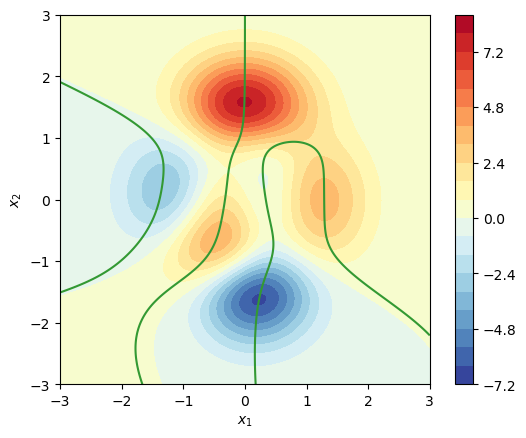

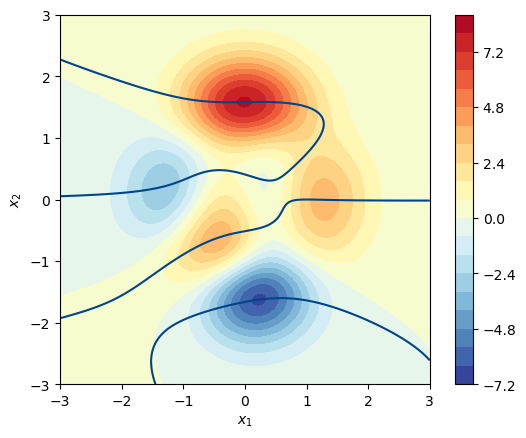

In [33]:
# Partial x1 equal to zero
fig, ax = plt.subplots()

colorbar = ax.contourf(xx,yy, f_xy_zz, 20, cmap='RdYlBu_r')
fig.colorbar(colorbar, ax=ax)
ax.contour(xx,yy, df_dx_zz, levels = [0],
           colors = '#339933')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

# Partial x2 equal to zero
fig, ax = plt.subplots()

colorbar = ax.contourf(xx,yy, f_xy_zz, 20, cmap='RdYlBu_r')
fig.colorbar(colorbar, ax=ax)
ax.contour(xx,yy, df_dy_zz, levels = [0],
           colors = '#00448A')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()




C:\Users\iron tom\AppData\Local\Temp\ipykernel_48440\524495052.py:21: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for i in range(0,len(CS_y.allsegs[0])):


AttributeError: 'NoneType' object has no attribute 'add_collection'

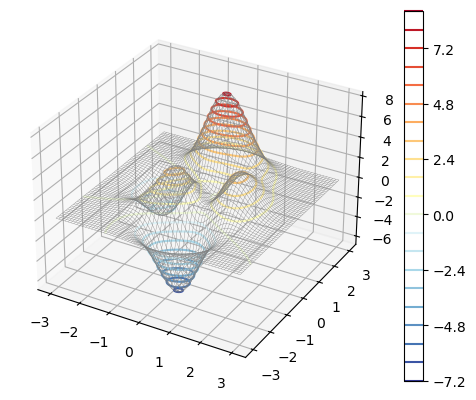

In [36]:
# stationary, intersections
# 这段代码在 vscode 内的 JupyterLab 使用不了，在 Anaconda 环境下的 Jupyterlab 可以使用
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

CS_y = ax.contour(xx,yy, df_dy_zz, levels = [0],
           colors = '#339933')
CS_x = ax.contour(xx,yy, df_dx_zz, levels = [0],
           colors = '#339933')
ax.cla()  

ax.plot_wireframe(xx,yy, f_xy_zz,
                  color = [0.5,0.5,0.5],
                  rstride=5, cstride=5,
                  linewidth = 0.25)

colorbar = ax.contour(xx,yy, f_xy_zz,20,
             cmap = 'RdYlBu_r')

fig.colorbar(colorbar, ax=ax)

for i in range(0,len(CS_y.allsegs[0])):

    contour_points_x_y = CS_y.allsegs[0][i]
    
    contour_points_z = f_xy_fcn(contour_points_x_y[:,0],
                                contour_points_x_y[:,1])
    
    
    ax.plot3D(contour_points_x_y[:,0],
              contour_points_x_y[:,1], 
              contour_points_z,
              color = '#339933',
              linewidth = 1)


for i in range(0,len(CS_x.allsegs[0])):

    contour_points_x_y = CS_x.allsegs[0][i]
    
    contour_points_z = f_xy_fcn(contour_points_x_y[:,0],
                                contour_points_x_y[:,1])
    
    
    ax.plot3D(contour_points_x_y[:,0],
              contour_points_x_y[:,1], 
              contour_points_z,
              color = '#00448A',
              linewidth = 1)
    
ax.set_proj_type('ortho')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1,x_2)$')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax.view_init(azim=-135, elev=30)
# ax.view_init(azim=-135, elev=60)
plt.tight_layout()
ax.grid(False)
plt.show()


fig, ax = plt.subplots()

colorbar = ax.contourf(xx,yy, f_xy_zz, 20, cmap='RdYlBu_r')
fig.colorbar(colorbar, ax=ax)

ax.contour(xx,yy, df_dx_zz, levels = [0],
           colors = '#339933',
           linestyles = '-')
ax.contour(xx,yy, df_dy_zz, levels = [0],
           colors = '#00448A',
           linestyles = '-')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

plt.gca().set_aspect('equal', adjustable='box')

plt.show()